In [115]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/stress.csv")
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [116]:
data=data[['text','label']]

In [117]:
df=data[['text','label']]

In [118]:
print(data.isnull().sum())

text     0
label    0
dtype: int64


In [119]:
import nltk
import re
nltk.download('stopwords')
#stemmer = nltk.SnowballStemmer("english")
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
lemmatizer=WordNetLemmatizer()
stopword=set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [120]:
def clean(text):
    text = str(text).lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    #text = re.sub('https?://\S+|www\.\S+', '', text)
    # text = re.sub('<.*?>+', '', text)
    # text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # text = re.sub('\n', '', text)
    # text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

In [121]:
data['text']

0       said felt way  suggeted go rest   trigger ahea...
1       hey r assistance  sure right place post   go  ...
2       mom hit newspaper shocked would  know like pla...
3       met new boyfriend  amazing  kind  sweet  good ...
4       october domestic violence awareness month dome...
                              ...                        
2833       week ago  precious    ignored      jan    h...
2834    ability cope anymore  trying  lot thing trigge...
2835    case first time reading post    looking people...
2836    find normal  good relationship  main problem s...
2837    talking mom morning said sister  trauma worse ...
Name: text, Length: 2838, dtype: object

### Wordcloud

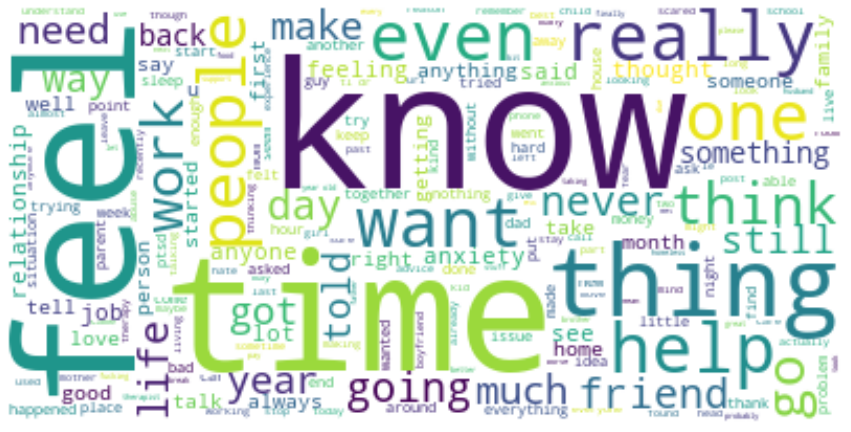

In [122]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [123]:
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "label"]]
print(data.head())

                                                text      label
0  said felt way  suggeted go rest   trigger ahea...     Stress
1  hey r assistance  sure right place post   go  ...  No Stress
2  mom hit newspaper shocked would  know like pla...     Stress
3  met new boyfriend  amazing  kind  sweet  good ...     Stress
4  october domestic violence awareness month dome...     Stress


In [124]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
y = np.array(data["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

In [126]:
X[1].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

##Bernoulli Naive Bayes

In [127]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(xtrain, ytrain)

BernoulliNB()

In [128]:
y_pred=bnb.predict(xtest)

In [129]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

   No Stress       0.82      0.62      0.70       444
      Stress       0.72      0.87      0.79       493

    accuracy                           0.75       937
   macro avg       0.77      0.75      0.75       937
weighted avg       0.76      0.75      0.75       937



## Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=7, max_samples=0.7) # class_weight=None,
rfc.fit(xtrain,ytrain)
Y_pred = rfc.predict(xtest)

In [131]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(ytest, Y_pred))
print(classification_report(ytest, Y_pred))
print(accuracy_score(ytest, Y_pred))

[[287 157]
 [102 391]]
              precision    recall  f1-score   support

   No Stress       0.74      0.65      0.69       444
      Stress       0.71      0.79      0.75       493

    accuracy                           0.72       937
   macro avg       0.73      0.72      0.72       937
weighted avg       0.73      0.72      0.72       937

0.7235859124866596


## XGBoost

In [132]:
from sklearn.ensemble import GradientBoostingClassifier
xgbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=7,max_depth=4,subsample=0.8)
xgbc.fit(xtrain, ytrain)

GradientBoostingClassifier(max_depth=4, n_estimators=500, random_state=7,
                           subsample=0.8)

In [133]:
y_pred=xgbc.predict(xtest)

In [134]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))
print(accuracy_score(ytest, y_pred))

[[314 130]
 [144 349]]
              precision    recall  f1-score   support

   No Stress       0.69      0.71      0.70       444
      Stress       0.73      0.71      0.72       493

    accuracy                           0.71       937
   macro avg       0.71      0.71      0.71       937
weighted avg       0.71      0.71      0.71       937

0.7075773745997865


bnb -> BernoulliNB

rfc -> RandomForestClassifier

xgbc -> GradientBoostingClassifier

In [135]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = bnb.predict(data)
print(output)

Enter a Text: gfkhghgc
['No Stress']


##Deep Learning

In [136]:
df.head()

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


In [137]:
X=df.drop('label',axis=1)

In [138]:
y=df['label']

In [139]:
import tensorflow as tf

In [140]:
tf.__version__

'2.8.2'

In [141]:
from tensorflow.keras.layers import Embedding   #helps us to do word2vec implementation
from tensorflow.keras.preprocessing.sequence import pad_sequences    #used for padding, either pre or post
from tensorflow.keras.models import Sequential  #helps to form a cluster of a layer that is linearly stacked into tf.keras.model
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [142]:
### Vocabulary size
voc_size=10000

OneHot Representation

OHE representation will give me on which index the words are present in 5000 words itself.

In [143]:
messages=X.copy()

In [144]:
messages['text'][1]

"Hey there r/assistance, Not sure if this is the right place to post this.. but here goes =) I'm currently a student intern at Sandia National Labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. We're looking for current undergrad/grad STEM students so if you're a STEM student or know STEM students, I would greatly appreciate if you can help take or pass along this short survey. As a thank you, everyone who helps take the survey will be entered in to a drawing for chance to win one of three $50 Amazon gcs."

In [145]:
import nltk
import re
from nltk.corpus import stopwords

In [146]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [147]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer ##stemming purpose
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
lemmatizer=WordNetLemmatizer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    #review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [148]:
corpus[1]

'hey r assistance sure right place post go currently student intern sandia national lab working survey help improve marketing outreach effort many school recruit around country looking current undergrad grad stem student stem student know stem student would greatly appreciate help take pas along short survey thank everyone help take survey entered drawing chance win one three amazon gc'

In [149]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[8250,
  9660,
  4608,
  9168,
  7923,
  5135,
  8535,
  8893,
  3409,
  9057,
  8512,
  8791,
  3833,
  8779,
  7799,
  7710,
  2556,
  5766,
  1393,
  6521,
  6166,
  6205,
  9870,
  8339,
  8847,
  7334,
  5453,
  7137,
  4084,
  7395,
  5439,
  7408,
  1599,
  1266,
  981,
  1123,
  9587,
  7799,
  9499,
  428,
  7906,
  2557,
  8401,
  7621,
  487,
  7799,
  4764,
  9604,
  8840,
  9151,
  4371,
  2077,
  7411,
  7761],
 [2212,
  5290,
  5775,
  6263,
  5168,
  1103,
  138,
  7923,
  599,
  5373,
  6070,
  4414,
  4835,
  9659,
  2742,
  377,
  7566,
  6923,
  1079,
  7901,
  1912,
  8117,
  8255,
  8774,
  1979,
  6159,
  6937,
  4227,
  7308,
  1004,
  1268,
  5373,
  1268,
  5373,
  7086,
  1268,
  5373,
  8922,
  3779,
  2474,
  7566,
  3788,
  7754,
  7352,
  314,
  377,
  6947,
  3836,
  7566,
  3788,
  377,
  9604,
  9216,
  5760,
  6706,
  8401,
  9252,
  87,
  5971],
 [6282,
  8071,
  2151,
  6387,
  8922,
  7086,
  8512,
  4706,
  2743,
  6110,
  2999,
  2743,
  3843,
 

In [150]:
corpus[1]

'hey r assistance sure right place post go currently student intern sandia national lab working survey help improve marketing outreach effort many school recruit around country looking current undergrad grad stem student stem student know stem student would greatly appreciate help take pas along short survey thank everyone help take survey entered drawing chance win one three amazon gc'

In [151]:
onehot_repr[1]

[2212,
 5290,
 5775,
 6263,
 5168,
 1103,
 138,
 7923,
 599,
 5373,
 6070,
 4414,
 4835,
 9659,
 2742,
 377,
 7566,
 6923,
 1079,
 7901,
 1912,
 8117,
 8255,
 8774,
 1979,
 6159,
 6937,
 4227,
 7308,
 1004,
 1268,
 5373,
 1268,
 5373,
 7086,
 1268,
 5373,
 8922,
 3779,
 2474,
 7566,
 3788,
 7754,
 7352,
 314,
 377,
 6947,
 3836,
 7566,
 3788,
 377,
 9604,
 9216,
 5760,
 6706,
 8401,
 9252,
 87,
 5971]

Embedding Representation

In [152]:
length=[]
for i in range(len(onehot_repr)):
  length.append(len(onehot_repr[i]))

print(max(length))

143


In [153]:
sent_length=143
#post padding
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2077 7411 7761]
 [   0    0    0 ... 9252   87 5971]
 [   0    0    0 ... 9398 6110 4863]
 ...
 [   0    0    0 ... 7906 9015 1290]
 [   0    0    0 ... 3651 7758 8765]
 [   0    0    0 ...  345 3073 7350]]


In [154]:
embedded_docs[3]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4863,
       5453, 9403, 7304,  567,   37, 6598, 5373, 8512, 2459, 6232, 8512,
       4437, 1998, 8703, 7915, 9660, 3448, 2774, 9598, 2762, 9403, 5207,
       3857, 3448, 9365, 8160, 1614, 8839, 1998,  168, 3034, 8839, 7408,
       5542, 8594, 1998, 6442, 8839, 5542, 6963, 3394, 4077, 9660,  168,
       6774, 9733, 2658, 9766, 7040, 3277, 9710, 7408, 9321, 8065, 1724,
       3822, 9083, 9403, 4437, 1998, 8512, 6774, 8512, 2459, 3394, 1998,
       5453, 6774, 1998, 2658, 1193, 1428, 3448, 9365, 9365, 6584, 6598,
       2459, 3706, 4830, 7086, 8160, 3897, 1998, 4608, 6774, 5075, 8319,
       2396, 6963, 2944, 6285, 7638, 5177, 8417,  953, 8347, 1583, 9766,
       7086, 4437, 5168, 1998, 4608, 9660, 3075, 6963, 1998, 4608, 9361],
      dtype=int32)

In [155]:
## Creating model
embedding_vector_features=200 ##features representation -> every index will be represented by 50 different index
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(110))   #LSTM with 100 neurons
model.add(Dense(1,activation='sigmoid'))  # as my op is binary I will use sigmoid activation function
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 143, 200)          2000000   
                                                                 
 lstm_1 (LSTM)               (None, 110)               136840    
                                                                 
 dense_1 (Dense)             (None, 1)                 111       
                                                                 
Total params: 2,136,951
Trainable params: 2,136,951
Non-trainable params: 0
_________________________________________________________________
None


Adding dropout

In [156]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=200
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.25))
model.add(LSTM(110))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 143, 200)          2000000   
                                                                 
 dropout (Dropout)           (None, 143, 200)          0         
                                                                 
 lstm_2 (LSTM)               (None, 110)               136840    
                                                                 
 dropout_1 (Dropout)         (None, 110)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 111       
                                                                 
Total params: 2,136,951
Trainable params: 2,136,951
Non-trainable params: 0
_________________________________________________________________
None


In [157]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.30, random_state=42)

Model Training

In [159]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=64)

Epoch 1/15
32/32 [==============================] - 16s 420ms/step - loss: 0.6780 - accuracy: 0.5609 - val_loss: 0.6570 - val_accuracy: 0.6385
Epoch 2/15
32/32 [==============================] - 12s 379ms/step - loss: 0.5411 - accuracy: 0.8112 - val_loss: 0.5662 - val_accuracy: 0.7113
Epoch 3/15
32/32 [==============================] - 12s 390ms/step - loss: 0.3038 - accuracy: 0.8822 - val_loss: 0.6059 - val_accuracy: 0.7230
Epoch 4/15
32/32 [==============================] - 12s 379ms/step - loss: 0.1445 - accuracy: 0.9567 - val_loss: 0.7188 - val_accuracy: 0.7242
Epoch 5/15
32/32 [==============================] - 12s 386ms/step - loss: 0.0678 - accuracy: 0.9809 - val_loss: 1.1772 - val_accuracy: 0.7113
Epoch 6/15
32/32 [==============================] - 12s 382ms/step - loss: 0.0470 - accuracy: 0.9859 - val_loss: 1.0185 - val_accuracy: 0.7042
Epoch 7/15
32/32 [==============================] - 12s 391ms/step - loss: 0.0176 - accuracy: 0.9955 - val_loss: 1.3788 - val_accuracy: 0.6948

Performance Metrics and Accuracy

In [92]:
y_pred=model.predict(X_test)

In [93]:
y_pred=np.where(y_pred > 0.5, 1,0) ##AUC ROC Curve

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
confusion_matrix(y_test,y_pred)

array([[255, 159],
       [116, 322]])

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6772300469483568

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65       414
           1       0.67      0.74      0.70       438

    accuracy                           0.68       852
   macro avg       0.68      0.68      0.68       852
weighted avg       0.68      0.68      0.68       852



In [99]:
def cleaned(doc):
  corpus2 = []
  review = re.sub('[^a-zA-Z]', ' ',doc)
  review = review.lower()
  review = review.split()     
  review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus2.append(review)
  onehot_repr2=[one_hot(words,voc_size)for words in corpus2]
  embedded_docs2=pad_sequences(onehot_repr2,padding='pre',maxlen=143)
  final_input=np.array(embedded_docs2)
  return  final_input

In [166]:
user=input("Enter Text ")
inp=cleaned(user)

Enter TextSometime I feel like I need some help


In [167]:
user_predict= model.predict(inp)
print(user_predict)
user_predict= model.predict(inp)
classes=np.round(user_predict).astype("int")
print(classes)

[[0.9714805]]
[[1]]


In [168]:
res="No stress" if classes==0 else "Stress"
print(res)

Stress
